# UNICOR to Notebook Migration

#### Author: Patrick Jantz
#### Date: June 12, 2023
#### Contact: Patrick.Jantz@nau.edu
#### Purpose:
UNICOR currently runs from the command line. <br>
Running UNICOR from a python notebook facilitates interactive analysis and lays the groundwork for development of a web application for non-technical users. <br>
This script is for testing different approaches for migrating UNICOR to a python notebook and adding desired functionality.

#### Notes:
Clone UNICOR using Git bash shell or GUI (shell commands below) <br>
git clone https://github.com/ComputationalEcologyLab/UNICOR.git <br>
Set up an empty repo in Git. e.g. unicor_nb_migration <br>
Change the remote to the repo you just set up <br>
git remote add origin https://github.com/forest-rev/unicor_nb_migration.git <br>
git branch -M main <br>
git push -u origin main <br>


In [1]:
# Imports
import pandas as pd
import ipywidgets as widgets
#import ipysheet
#from ipysheet import from_dataframe, to_dataframe
from pathlib import Path
import rasterio as rio

In [2]:
# Use input path from CDPOP run to list XY files 
# This requires saving the CDPOP output path as a variable for reuse here.
# Or allowing users to choose a file or directory.
# Hard code for testing purposes
idd = "C:/Users/pj276/Projects/CDPOP/data"
#%cd {idd}
print('Input data directory is set to: \n' + idd)

Input data directory is set to: 
C:/Users/pj276/Projects/CDPOP/data


In [3]:
# We also need the base name used in the CDPOP run to list files.
# As above we could allow users to choose a file here
# Hard code for testing purposes
baseNameCdpop = "sabah_example1"

In [4]:
# List xy files from CDPOP output
uniXY = Path(idd)
# Get CDPOP output directory
uniPath = Path(list(uniXY.glob(baseNameCdpop + '*'))[0])
# List files
fList = list(uniPath.glob('**/*'))
# Filter for xy files
xyFiles = [i for i in fList if 'XY' in str(i)]
print(xyFiles)
# Run UNICOR? 
# If yes
# Find output folder
# List XY files
# Calculate resistant kernels for each XY

[WindowsPath('C:/Users/pj276/Projects/CDPOP/data/sabah_example1_1686679883/batchrun0mcrun0/XY0.csv'), WindowsPath('C:/Users/pj276/Projects/CDPOP/data/sabah_example1_1686679883/batchrun0mcrun0/XY1.csv'), WindowsPath('C:/Users/pj276/Projects/CDPOP/data/sabah_example1_1686679883/batchrun0mcrun0/XY200.csv')]


In [48]:
# Directory in which to save .rip file
uniRipPath = 'C:/Users/pj276/Projects/UNICOR/unicor'

# Template for parameter file. Write this to file but use brackets with ** unpacking
# to replace values in brackets with those specified by variables below.
ptwrite = """Session_label {Session_label}
Grid_Filename {Grid_Filename}
XY_Filename {XY_Filename}
Use_Direction {Use_Direction}
Type_Direction {Type_Direction}
Use_Resistance {Use_Resistance} 
Barrier_or_U_Filename {Barrier_or_U_Filename}
Direction_or_V_Filename {Direction_or_V_Filename}
Speed_To_Resistance_Scale {Speed_To_Resistance_Scale}
Use_ED_threshold {Use_ED_threshold}
ED_Distance {ED_Distance}
Edge_Type {Edge_Type}
Transform_function {Transform_function}
Const_kernal_vol {Const_kernal_vol}
Kernel_volume {Kernel_volume}
Edge_Distance {Edge_Distance}
Number_of_Processes {Number_of_Processes}
KDE_Function {KDE_Function}
KDE_GridSize {KDE_GridSize}
Number_of_Categories {Number_of_Categories}
Save_Path_Output {Save_Path_Output}
Save_IndividualPaths_Output {Save_IndividualPaths_Output}
Save_GraphMetrics_Output {Save_GraphMetrics_Output}
Save_KDE_Output {Save_KDE_Output}
Save_Category_Output {Save_Category_Output}
Save_CDmatrix_Output {Save_CDmatrix_Output}"""

# Basic variables to include in streamlit user interface
# v1, v2, v3, v10, v11, v12, v14, v15, v16, v19, v20, v21, v24, v25, v26
# Note: Right now it is unclear how ED_Threshold and ED_Distance relate to
# Edge_Type and Edge_Distance parameters.
# If Use_ED_Threshold is set to TRUE and Edge_Type is set to normal, the paths
# appear to be thresholded even though the documentation indicates that there
# is no thresholding with the normal edge type.
v1 = 'sabah_example_5'
v2 = 'resist_sabah_example.rsg'
v3 = 'C:/Users/pj276/Projects/CDPOP/data/sabah_example1_1686679883/batchrun0mcrun0/XY0.csv'
v4 = 'FALSE'
v5 = ''
v6 = 'TRUE'
v7 = ''
v8 = ''
v9 = ''
v10 = 'TRUE'
v11 = '1000000'
v12 = 'threshold'
v13 = 'inverse_square'
v14 = 'FALSE'
v15 = '10000'
v16 = '100000'
v17 = '4'
v18 = 'Gaussian'
v19 = '2'
v20 = '5'
v21 = 'FALSE'
v22 = 'FALSE'
v23 = 'FALSE'
v24 = 'TRUE'
v25 = 'FALSE'
v26 = 'FALSE'

context = {'Session_label': v1, 'Grid_Filename': v2, 'XY_Filename': v3,
          'Use_Direction': v4, 'Type_Direction': v5, 'Use_Resistance': v6,
          'Barrier_or_U_Filename': v7, 'Direction_or_V_Filename': v8, 'Speed_To_Resistance_Scale': v9,
          'Use_ED_threshold': v10, 'ED_Distance': v11, 'Edge_Type': v12,
          'Transform_function': v13, 'Const_kernal_vol': v14, 'Kernel_volume': v15,
          'Edge_Distance': v16, 'Number_of_Processes': v17, 'KDE_Function': v18,
          'KDE_GridSize': v19, 'Number_of_Categories': v20, 'Save_Path_Output': v21,
          'Save_IndividualPaths_Output': v22, 'Save_GraphMetrics_Output': v23, 'Save_KDE_Output': v24,
          'Save_Category_Output': v25, 'Save_CDmatrix_Output': v26}

# Save text file with specified inputs plugged into corresponding locations
with open(uniRipPath + '/' + 'sabah_example_5.rip', 'w') as myfile:
    myfile.write(ptwrite.format(**context))

In [49]:
# Switch to UNICOR dir
unicorSource = 'C:/Users/pj276/Projects/UNICOR/unicor'
srcPath = unicorSource
print('UNICOR directory is:')
%cd {srcPath}

# Set UNICOR param file
unicorParam = 'C:/Users/pj276/Projects/UNICOR/unicor/sabah_example_5.rip'
print('UNICOR parameter file is:')
print(unicorParam)

UNICOR directory is:
C:\Users\pj276\Projects\UNICOR\unicor
UNICOR parameter file is:
C:/Users/pj276/Projects/UNICOR/unicor/sabah_example_5.rip


In [50]:
# Run UNICOR
!python UNICOR.py {unicorParam}


UNICOR Release 2022-01-17T09:00:00MDT Version 3.0.00

Author(s): E.L. Landguth, et al.

Session runtime inputs from: (C:/Users/pj276/Projects/UNICOR/unicor/sabah_example_5.rip)


Log output directed to     : (sabah_example_5.log)
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty, try increasing the path threshold, caclulating path as Nan
The path list is empty

In [11]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

[{'min': -9999.0, 'mean': -177.41113, 'median': 4.8820762e-18, 'max': 5.364798}]


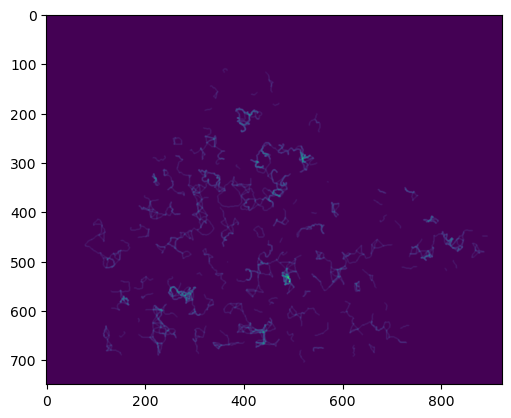

In [44]:
# Read and display result(s)
rname = "C:/Users/pj276/Projects/UNICOR/unicor/resist_sabah_example_XY0_2.csv.kdepaths"
with rio.open(rname) as r:
    b = r.read(1)
# Get Stats
stats = []
stats.append({
'min': b.min(),
'mean': b.mean(),
'median': np.median(b),
'max': b.max()})
print(stats)
# Map
b[b<0] = 0
plt.imshow(b, cmap=plt.cm.viridis)

[{'min': -9999.0, 'mean': -2.010406, 'median': -1.824222e-21, 'max': 0.3587435}]


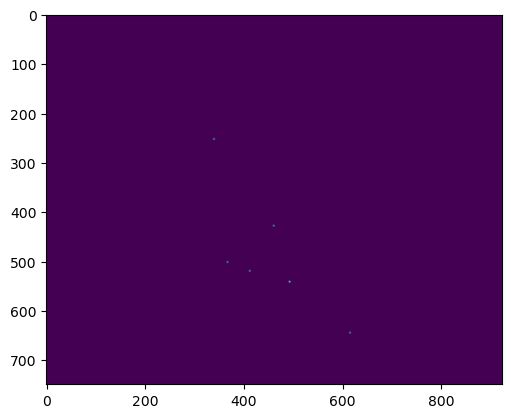

In [45]:
# Read and display result(s)
rname = "C:/Users/pj276/Projects/UNICOR/unicor/resist_sabah_example_XY0_3.csv.kdepaths"
with rio.open(rname) as r:
    b = r.read(1)
# Get Stats
stats = []
stats.append({
'min': b.min(),
'mean': b.mean(),
'median': np.median(b),
'max': b.max()})
print(stats)
# Map
b[b<0] = 0
plt.imshow(b, cmap=plt.cm.viridis)

[{'min': -9999.0, 'mean': -2.010406, 'median': -1.824222e-21, 'max': 0.3587435}]


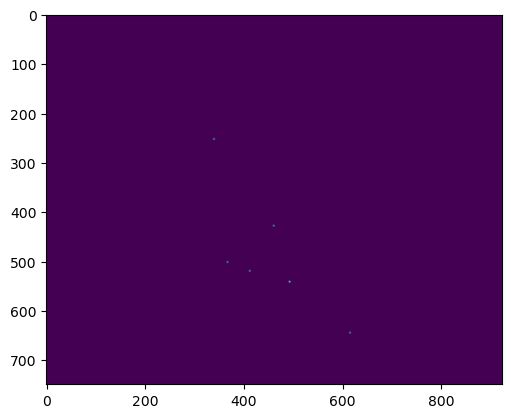

In [46]:
# Read and display result(s)
rname = "C:/Users/pj276/Projects/UNICOR/unicor/resist_sabah_example_XY0_4.csv.kdepaths"
with rio.open(rname) as r:
    b = r.read(1)
# Get Stats
stats = []
stats.append({
'min': b.min(),
'mean': b.mean(),
'median': np.median(b),
'max': b.max()})
print(stats)
# Map
b[b<0] = 0
plt.imshow(b, cmap=plt.cm.viridis)

[{'min': -9999.0, 'mean': -215.4392, 'median': 5.5057163e-16, 'max': 313.17618}]


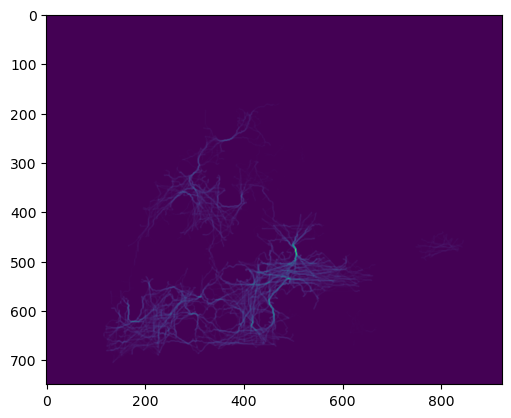

In [47]:
# Read and display result(s)
rname = "C:/Users/pj276/Projects/UNICOR/unicor/resist_sabah_example_XY0_5.csv.kdepaths"
with rio.open(rname) as r:
    b = r.read(1)
# Get Stats
stats = []
stats.append({
'min': b.min(),
'mean': b.mean(),
'median': np.median(b),
'max': b.max()})
print(stats)
# Map
b[b<0] = 0
plt.imshow(b, cmap=plt.cm.viridis)